## Traditional Machine Learning vs Artificial Neural Network for Regression (STUDENT)
Billy Hau (7/18/2022)

In this notebook, we will go over a simple regression problem to demonstrate why neural networks are much more powerful than traditional machine learning algorithms like those we used in Scikit-Learn. We are only focusing on fitting the trendline today, so we will skip the train-test-split. But make sure when you are dealing with real data, be sure to validate your model!

In [34]:
# Import Numpy, Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Collection / Creation
Create a dummy dataset for fitting... let's do a cosine curve!

In [35]:
# Create Random X Integers Values
X = np.random.randint(low=0, high=10000, size=200000)/1000
X

array([9.352, 2.455, 9.831, ..., 8.686, 9.922, 6.39 ])

In [36]:
# Create a Cosine curve and add some random noise for Y
Y = 2 * np.cos(X) + np.random.rand(X.shape[0]) / 10

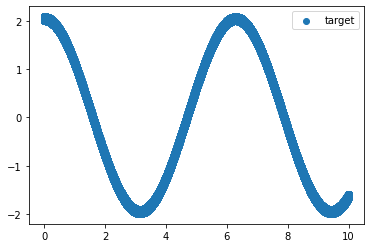

In [37]:
# Let's create a scatter plot to preview the data
plt.scatter(X, Y, label='target')
plt.legend()

### Traditional Machine Learning Fitting (Linear Regression)

In [38]:
# Import Linear Regression from Scikit-Learn library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [39]:
# Create a Linear Regression model and fit X and Y
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

LinearRegression()

In [40]:
# Let's calculate the mean squared error to see how well the fit is
from sklearn.metrics import mean_squared_error
predict = model.predict(X.reshape(-1, 1))
mean_squared_error(Y, predict)

1.9784261446626799

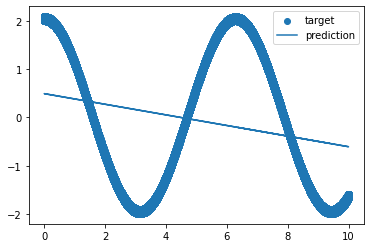

In [41]:
# Create a scatter plot to compare the target data and the model's prediction
plt.scatter(X, Y, label='target')
plt.plot(X, predict, label='prediction')
plt.legend(loc="best")

### Traditional Machine Learning Fitting (Feature Engineering X^2)

Well, that's a horrible fit! Let's see if we can do better with some feature engineering! Since this is look like a polynomial, why don't we create a X^2 column?

In [42]:
# Create a new pandas DataFrame with the X data
df = pd.DataFrame(X)

In [43]:
# Rename the Column as X
df.columns = ['X']
df

,X
0,9.352
1,2.455
2,9.831
3,8.497
4,8.901
...,...
199995,0.502
199996,8.272
199997,8.686
199998,9.922


In [44]:
# Create a new column X2 that is X^2
df['X2'] = X ** 2

In [45]:
# Let's create a new model called model2, fit the DataFrame and calculate the mean squared error
model2 = LinearRegression()
model2.fit(df, Y)
predict2 = model2.predict(df)
mean_squared_error(Y, predict2)

1.9474702944870195

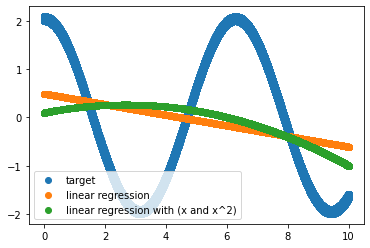

In [46]:
# Let's plot the target, linear regression (x), linear regression with (x and x^2)
plt.scatter(X, Y, label='target')
plt.scatter(X, predict, label='linear regression')
plt.scatter(X, predict2, label='linear regression with (x and x^2)')
plt.legend(loc='best')

### Traditional Machine Learning Fitting (Feature Engineering X^3)

Eh, I guess at least it curved... X^3!

In [48]:
# Let's Make a copy of the DataFrame df and create X3 column
df2 = df.copy()
df2['X3'] = X ** 3

In [49]:
# Make a LR model called model3, fit it with the data, predict and caclulate the mean squared error
model3 = LinearRegression()
model3.fit(df2, Y)
predict3 = model3.predict(df2)
mean_squared_error(Y, predict3)

0.5930618069655015

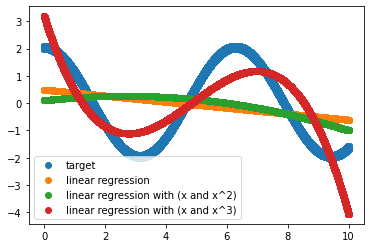

In [52]:
# Let's plot and see the result
plt.scatter(X, Y, label='target')
plt.scatter(X, predict, label='linear regression')
plt.scatter(X, predict2, label='linear regression with (x and x^2)')
plt.scatter(X, predict3, label='linear regression with (x and x^3)')
plt.legend(loc='best')

### Artificial Neural Network (MLP)
Alright, that's better, not ideal, but alright fit. Maybe we need to do more feature engineering, or pick a different algorithm like Random Forest... but let's give Artificial Neural Netowrk a try and see how it performs. 

Remember how the activation function in a neural network gives the model its non-linearity? This data set is non-linear, so let's see how it do!

Let's start with a Simple Artificial Neural Network (Multi-Layer Perceptron)

In [53]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

2022-07-23 12:21:47.413793: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [55]:
# Let's Create a Simple Multi-Layer Perceptron
# 3 layers: Input with 1 node / Hidden Layer with 64 nodes (use 'relu' for activation) / Output Layer with 1 node

input = keras.layers.Input(1)
x = keras.layers.Dense(64, activation='relu')(input)
output = keras.layers.Dense(1)(x)

In [56]:
# Create model4 in Keras
model4 = keras.Model(input, output)

In [61]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile the model with Adam optimizer, Mean Squared Error as losses and metrics
model4.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [58]:
# Let's fit the model for 100 epochs. If you have a GPU, you can try upping the batch_size to around 4096 to speed up training
# Though smaller batch also make a model less likely to overfitted... it's a trade off
# You can run the training for longer or shorter by changing the epochs
history = model4.fit(X,Y, epochs=100, batch_size=4096)

Epoch 1/100
196/196 [==============================] - 1s 2ms/step - loss: 1.9879 - mse: 1.9879
Epoch 2/100
196/196 [==============================] - 0s 2ms/step - loss: 1.9350 - mse: 1.9350
Epoch 3/100
196/196 [==============================] - 0s 2ms/step - loss: 1.8732 - mse: 1.8732
Epoch 4/100
196/196 [==============================] - 0s 2ms/step - loss: 1.8022 - mse: 1.8022
Epoch 5/100
196/196 [==============================] - 1s 3ms/step - loss: 1.7408 - mse: 1.7408
Epoch 6/100
196/196 [==============================] - 1s 3ms/step - loss: 1.6982 - mse: 1.6982
Epoch 7/100
196/196 [==============================] - 1s 3ms/step - loss: 1.6744 - mse: 1.6744
Epoch 8/100
196/196 [==============================] - 1s 3ms/step - loss: 1.6648 - mse: 1.6648
Epoch 9/100
196/196 [==============================] - 0s 2ms/step - loss: 1.6616 - mse: 1.6616
Epoch 10/100
196/196 [==============================] - 0s 3ms/step - loss: 1.6611 - mse: 1.6611
Epoch 11/100
196/196 [=================

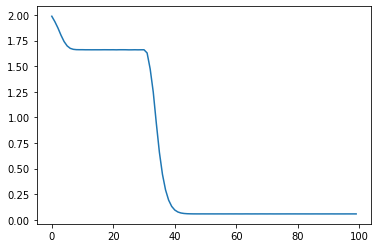

In [59]:
# Let's plot the fitting history to see if we converged to a solution
plt.plot(history.history['loss'])

In [ ]:
# well, it seems that the model basically stop improving after like 20 epochs... 

In [62]:
predict4 = model4.predict(X)
mean_squared_error(Y, predict4)

6250/6250 [==============================] - 8s 1ms/step


0.05724559768285658

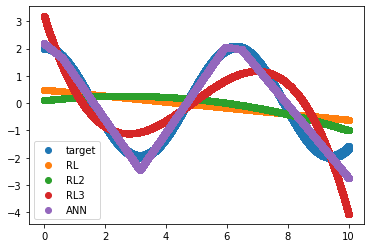

In [63]:
# Predict and plot to see how this do
plt.scatter(X, Y , label='target')
plt.scatter(X, predict, label='RL')
plt.scatter(X, predict2, label ='RL2')
plt.scatter(X, predict3, label ='RL3')
plt.scatter(X, predict4, label='ANN')
plt.legend(loc='best')

In [ ]:
# eh, ??? What's with the ANN? It fit very well in the beginning and then it died or something?

### Artificial Neural Network (Activation Function)
Let's take a look at the activation for ReLU...
<br>
<img src='https://raw.githubusercontent.com/shruti-jadon/Data_Science_Images/main/activation_function.png' height='300px'>

See how it drop off to zero? That's not good... that's because if the perceptron weight sum goes negative, the value became zero. This mess up the gradient descent algorithm in back propagation (the training process). 

Let's try ELU instead, it provie us a negative value when it is negative. The transition is also smooth unlike Leaky ReLU


In [65]:
# Create Model5 with ELU Activation Function and Compile with Adam + MSE
input2 = keras.layers.Input(1)
x2 = keras.layers.Dense(64, activation='elu')(input2)
output2 = keras.layers.Dense(1)(x2)

model5 = keras.Model(input2, output2)
model5.compile(optimizer='adam',
               loss=keras.losses.MeanSquaredError(), metrics=keras.metrics.MeanSquaredError())


Epoch 1/100
49/49 [==============================] - 1s 4ms/step - loss: 2.0122 - mean_squared_error: 2.0122
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 1.9781 - mean_squared_error: 1.9781
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 1.9638 - mean_squared_error: 1.9638
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 1.9489 - mean_squared_error: 1.9489
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 1.9289 - mean_squared_error: 1.9289
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 1.9039 - mean_squared_error: 1.9039
Epoch 7/100
49/49 [==============================] - 0s 4ms/step - loss: 1.8722 - mean_squared_error: 1.8722
Epoch 8/100
49/49 [==============================] - 0s 4ms/step - loss: 1.8338 - mean_squared_error: 1.8338
Epoch 9/100
49/49 [==============================] - 0s 4ms/step - loss: 1.7901 - mean_squared_error: 1.7901
Epoch 10/100
49/49 

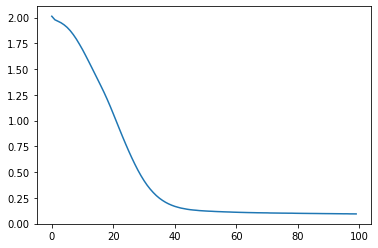

In [66]:
# Train Model 5 and plot the training loss
history = model5.fit(X, Y, epochs=100, batch_size=4096)
plt.plot(history.history['mean_squared_error'])

In [69]:
predict5 = model5.predict(X, batch_size=512)
mean_squared_error(Y, predict5)

391/391 [==============================] - 1s 1ms/step


0.09417930530195659

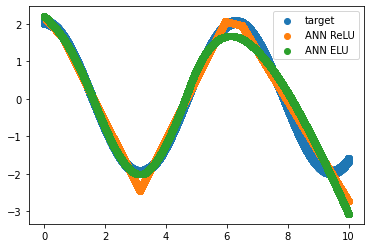

In [70]:
# Predict and plot the original ANN with ReLU and ANN with ELU
plt.scatter(X, Y, label='target')
plt.scatter(X, predict4, label='ANN ReLU')
plt.scatter(X, predict5, label='ANN ELU')
plt.legend(loc='best')

### Artificial Neural Network (Deep Learning)
Sweet! almost a perfect fit! Though, can we do better? Let's try adding more hidden layers and see what happens!

In [87]:
# Create Model6 with ELU Activation Function and Compile with Adam + MSE
# Model6 should be a deep neural network with input layer (1 node) / 6 hidden layers (8 nodes) / output layer (1 node)

input3 = keras.layers.Input(1)
x3 = keras.layers.Dense(8, activation='elu')(input3)
x3 = keras.layers.Dense(8, activation='elu')(x3)
x3 = keras.layers.Dense(8, activation='elu')(x3)
x3 = keras.layers.Dense(8, activation='elu')(x3)
x3 = keras.layers.Dense(8, activation='elu')(x3)
x3 = keras.layers.Dense(8, activation='elu')(x3)
output3 = keras.layers.Dense(1) (x3)

model6 = keras.Model(input3, output3)
model6.compile(optimizer='adam', loss=keras.losses.MeanSquaredError(), metrics=keras.metrics.MeanSquaredError())

Epoch 1/128
49/49 [==============================] - 1s 6ms/step - loss: 2.2124 - mean_squared_error: 2.2124
Epoch 2/128
49/49 [==============================] - 0s 8ms/step - loss: 1.9650 - mean_squared_error: 1.9650
Epoch 3/128
49/49 [==============================] - 0s 7ms/step - loss: 1.7681 - mean_squared_error: 1.7681
Epoch 4/128
49/49 [==============================] - 0s 6ms/step - loss: 1.2955 - mean_squared_error: 1.2955
Epoch 5/128
49/49 [==============================] - 0s 6ms/step - loss: 0.5378 - mean_squared_error: 0.5378
Epoch 6/128
49/49 [==============================] - 0s 6ms/step - loss: 0.1569 - mean_squared_error: 0.1569
Epoch 7/128
49/49 [==============================] - 0s 6ms/step - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 8/128
49/49 [==============================] - 0s 6ms/step - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 9/128
49/49 [==============================] - 0s 8ms/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 10/128
49/49 

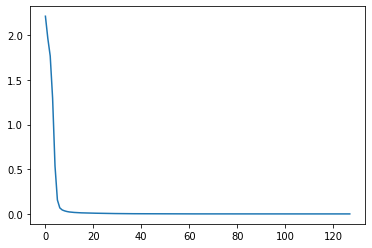

In [88]:
# Train and plot training loss for model6... if model didn't converge, try upping the epochs
history = model6.fit(X, Y, epochs=128, batch_size=4096)
plt.plot(history.history['mean_squared_error'])

391/391 [==============================] - 1s 2ms/step


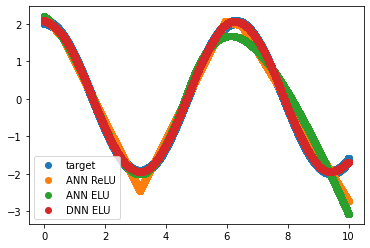

In [89]:
# Predict, plot and see how it does! The MSE is very low though!!!
predict6 = model6.predict(X, batch_size=512)
plt.scatter(X, Y, label='target')
plt.scatter(X, predict4, label='ANN ReLU')
plt.scatter(X, predict5, label='ANN ELU')
plt.scatter(X, predict6, label='DNN ELU')
plt.legend(loc='best')

In [90]:
model6.predict( [3.14167, 8.3, 9.9, 5.3])

1/1 [==============================] - 0s 55ms/step


array([[-1.9387916 ],
       [-0.78640705],
       [-1.7409495 ],
       [ 1.175135  ]], dtype=float32)

And that, Ladies and gentlemen, this is how you build an epic deep learning model with near perfect fit!
But of course, if you ask it to predict something like X = 20 it will fail epically too.
Do you know why? We will address the Time Series data problem in the Recurrent Neural Network section.

1/1 [==============================] - 0s 112ms/step


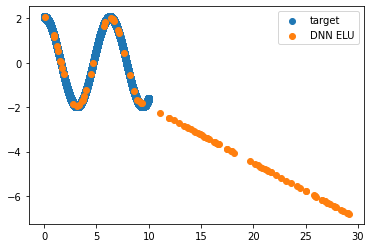

In [83]:
# Let's generate a new X that go from 0 to 30 and call it X2
# Use model6 to predict and plot it against the target
# does it follow the cosine curve tend that you expected?

X2 = np.random.uniform(0, 30, size=100)
Y2P = model6.predict(X2, batch_size=512)
plt.scatter(X, Y, label='target')
plt.scatter(X2, Y2P, label='DNN ELU')
plt.legend(loc='best')

Oh, btw, if someone tell you they can perfect predict stock price with Machine Learning, make sure they are not just showing you t = 0 to t = 10 xD

In [84]:
np.reshape(model6.predict([3.14167, 8.3, 9.9, 5.3]), (4))

1/1 [==============================] - 0s 40ms/step


array([-1.954522 , -0.7618207, -1.956065 ,  1.1670932], dtype=float32)